In [1]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Ref: https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

In [2]:
def plot_confusion_matrix_1(cf_matrix, title=None):
    class_names=[0,1]  #name of the classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(title + " confusion matrix", y=1.1)
    plt.ylabel('Acutal label')
    plt.xlabel('Predicted label')
    

(4000, 2)


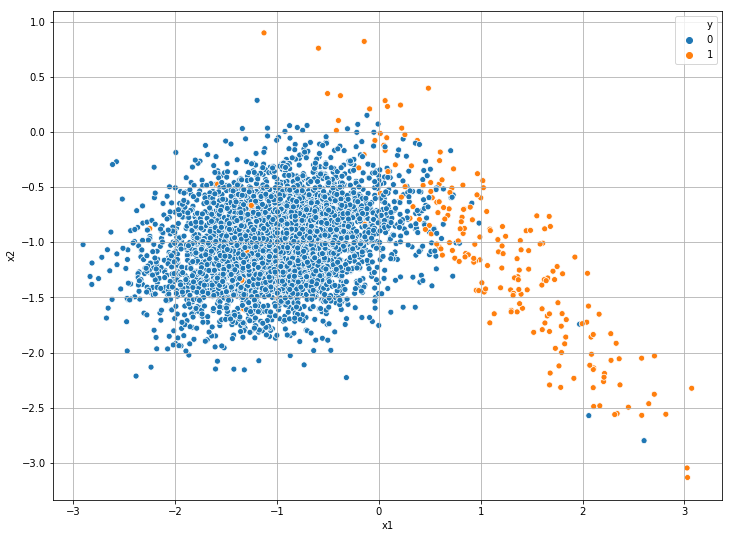

<Figure size 864x648 with 0 Axes>

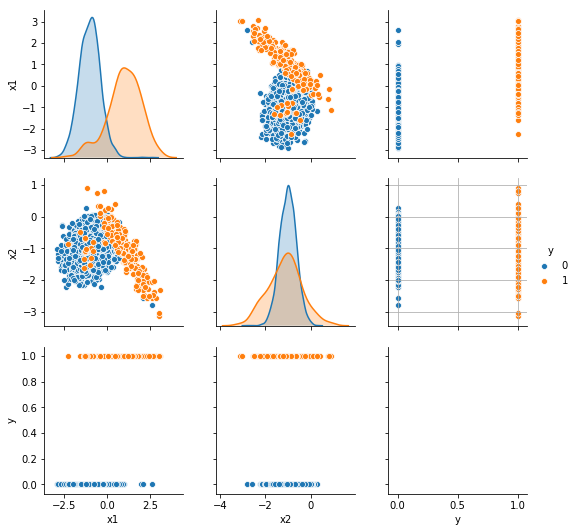

In [19]:

from sklearn.datasets import make_blobs, make_classification
# create a imbalanced dataset of 10K with 2 class

N = 4000
ratio = 95 # one class is 95%, the other is 5%

X,y = make_classification(n_samples=N  # number of samples
                          ,n_features=2    # feature/label count
                          ,n_informative=2 # informative features
                          ,n_redundant=0   # redundant features
                          ,n_repeated=0    # duplicate features
                          ,n_clusters_per_class=1  # number of clusters per class; clusters during plotting
                          ,weights=[ratio/100]   # proportions of samples assigned to each class
                          ,flip_y=0.01         # fraction of samples whose class is assigned randomly. 
                          ,random_state=888 )

print(X.shape)

# club together into a dataframe
df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

fig = plt.figure(figsize=(12,9))
sns.scatterplot(data=df,x='x1',y='x2',hue='y')
plt.grid()

fig = plt.figure(figsize=(12,9))
sns.pairplot(df[['x1','x2','y']],hue='y')
plt.grid()


plt.show()

disable sklearn regularization LogisticRegression(C=1e9)

add statsmodels intercept sm.Logit(y, sm.add_constant(X)) OR disable sklearn intercept LogisticRegression(C=1e9, fit_intercept=False)

sklearn returns probability for each class so model_sklearn.predict_proba(X)[:, 1] == model_statsmodel.predict(X)

use of predict function model_sklearn.predict(X) == (model_statsmodel.predict(X) > 0.5).astype(int)

In [30]:
print("percentage(y=0)", len(df.loc[df['y']==0])/len(df))
print("percentage(y=1)", len(df.loc[df['y']==1])/len(df))

percentage(y=0) 0.94675
percentage(y=1) 0.05325


 # train/test split

In [31]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

# split dataset into x,y
x = df.drop('y',axis=1)
y = df['y']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=888)


 train  performance
Accuracy Score: 0.9785714285714285
Area Under Curve: 0.8547144429497371
Recall score: 0.7162162162162162

 test  performance
Accuracy Score: 0.9833333333333333
Area Under Curve: 0.8606574042697391
Recall score: 0.7230769230769231


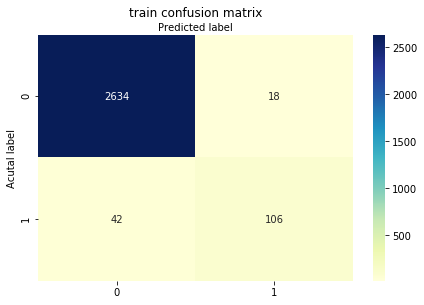

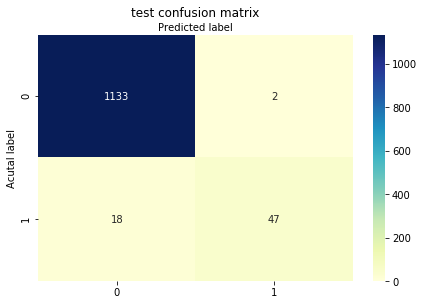

In [34]:
# LogisticRegression model
lg1 = LogisticRegression(random_state=111, class_weight=None, C=1e9)

# fit
lg1.fit(X_train,y_train)

# predict
y_train_pred = lg1.predict(X_train)

# with test data
y_test_pred = lg1.predict(X_test)

# confusion matrix for train and test
cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

def compute_performace(a=y_test, b= y_test_pred, title="test"):
    print("\n",title, " performance")
    print(f'Accuracy Score: {metrics.accuracy_score(a,b)}')
    print(f'Area Under Curve: {metrics.roc_auc_score(a, b)}')
    print(f'Recall score: {metrics.recall_score(a,b)}')

# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")

In [35]:
print("intercept = ", lg1.intercept_)
print("coef = ", lg1.coef_[0])

intercept =  [-0.88157188]
coef =  [3.73425858 1.91791096]


# consider the weight of samples


 train  performance
Accuracy Score: 0.9321428571428572
Area Under Curve: 0.9322795646325058
Recall score: 0.9324324324324325

 test  performance
Accuracy Score: 0.9358333333333333
Area Under Curve: 0.9153168417485598
Recall score: 0.8923076923076924


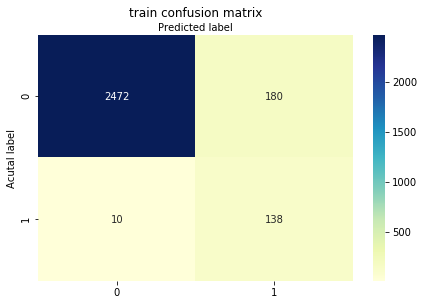

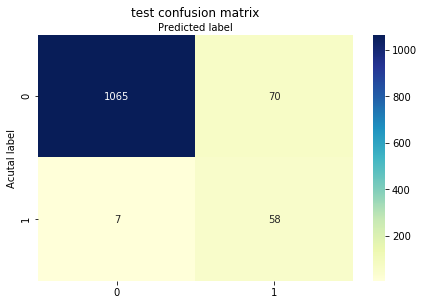

In [38]:
# define class weights
w = {0:ratio, 1:100-ratio}
# define model
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to 
# class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

lg2 = LogisticRegression(random_state=111, class_weight="balanced", C=1e9)

# fit
lg2.fit(X_train,y_train)

# predict
y_train_pred = lg2.predict(X_train)

# with test data
y_test_pred = lg2.predict(X_test)

# confusion matrix for train and test
cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")

In [39]:
print("intercept = ", lg2.intercept_)
print("coef = ", lg2.coef_[0])

intercept =  [1.3348344]
coef =  [2.72290473 1.3349057 ]


# random downsample

k =  1

 train  performance
Accuracy Score: 0.9391891891891891
Area Under Curve: 0.939010989010989
Recall score: 0.9357142857142857

 test  performance
Accuracy Score: 0.905511811023622
Area Under Curve: 0.9105783866057838
Recall score: 0.8767123287671232
intercept =  [1.15633487]
coef =  [3.05260235 1.28869606]


k =  2

 train  performance
Accuracy Score: 0.9435665914221218
Area Under Curve: 0.933739012846518
Recall score: 0.9019607843137255

 test  performance
Accuracy Score: 0.9528795811518325
Area Under Curve: 0.9520992366412214
Recall score: 0.95
intercept =  [1.12520559]
coef =  [3.04247032 1.58409051]


k =  3

 train  performance
Accuracy Score: 0.9610169491525423
Area Under Curve: 0.9392870980240218
Recall score: 0.896551724137931

 test  performance
Accuracy Score: 0.9409448818897638
Area Under Curve: 0.92235926628716
Recall score: 0.8823529411764706
intercept =  [0.86337752]
coef =  [3.40977697 1.76162269]




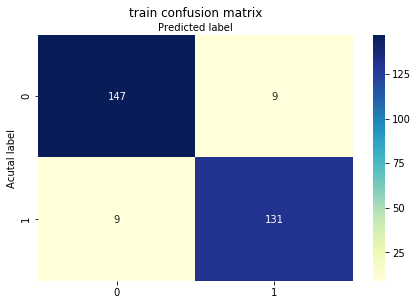

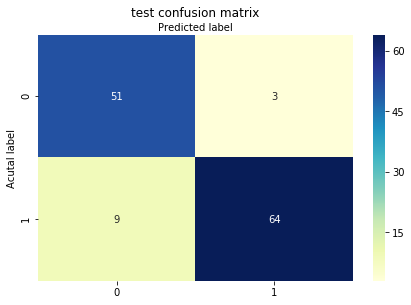

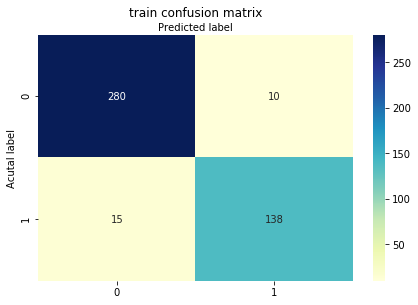

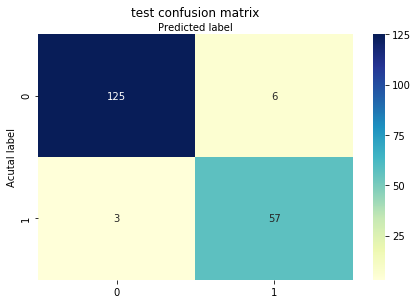

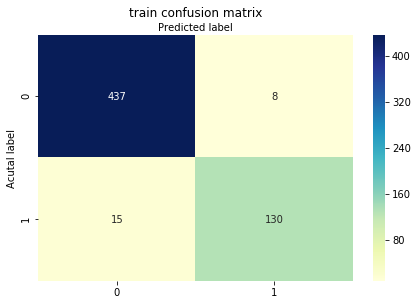

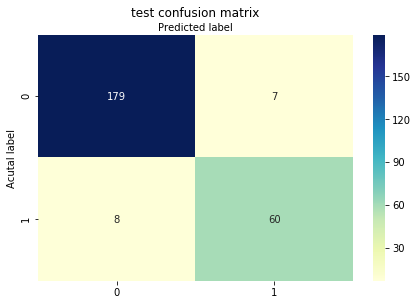

In [49]:
idx = df[df['y']==0].index # the majority class

scale = ratio/(100-ratio)

for k in [1,2,3]:

    idx_0 = np.random.choice(idx, size=int(N/scale*k), replace=True, p=None)

    df_rebalanced = df.loc[idx_0]

    # keep original y=1
    idx_1 = df[df['y']==1].index

    df_rebalanced = df_rebalanced.append(df.loc[idx_1])

    #print(df_rebalanced.describe())

    # split dataset into x,y
    x_rebalanced = df_rebalanced.drop('y',axis=1)
    y_rebalanced = df_rebalanced['y']
    # train-test split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_rebalanced, y_rebalanced, test_size=0.3, random_state=555)

    lg3 = LogisticRegression(random_state=888, class_weight=None, C=1e9)
    # fit it
    lg3.fit(X_train_1,y_train_1)

    y_train_pred = lg3.predict(X_train_1)
    # test
    y_test_pred = lg3.predict(X_test_1)
    # performance

    cf_matrix_train = metrics.confusion_matrix(y_train_1, y_train_pred)
    cf_matrix_test = metrics.confusion_matrix(y_test_1, y_test_pred)

    # train
    print("k = ", k)
    plot_confusion_matrix_1(cf_matrix_train, "train")
    compute_performace(y_train_1, y_train_pred, title="train")

    # test
    plot_confusion_matrix_1(cf_matrix_test, "test")
    compute_performace(y_test_1, y_test_pred, title="test")

    print("intercept = ", lg3.intercept_)
    print("coef = ", lg3.coef_[0])
    print("\n")

## For minority class, we can see the prediction accuracy has been improved dramatially. However, the model parameters were changed a lot too.

# use stat models

In [50]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf  # R style formula

lg_sm_1 = sm.Logit(y_train, sm.add_constant(X_train), family = "binomial").fit() 

lg_sm_1.summary()


Optimization terminated successfully.
         Current function value: 0.074366
         Iterations 10


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2797
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.6405
Time:                        23:05:13   Log-Likelihood:                -208.23
converged:                       True   LL-Null:                       -579.16
                                        LLR p-value:                8.026e-162
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8816      0.252     -3.494      0.000      -1.376      -0.387
x1             3.7343      0.241     15.501      0.000       3.262       4.206
x2             1.9179      0.317      6.047      0.000       1.296       2.540
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



 train  performance
Accuracy Score: 0.9785714285714285
Area Under Curve: 0.8547144429497371
Recall score: 0.7162162162162162

 test  performance
Accuracy Score: 0.9833333333333333
Area Under Curve: 0.8606574042697391
Recall score: 0.7230769230769231


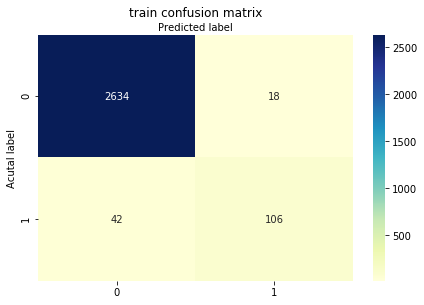

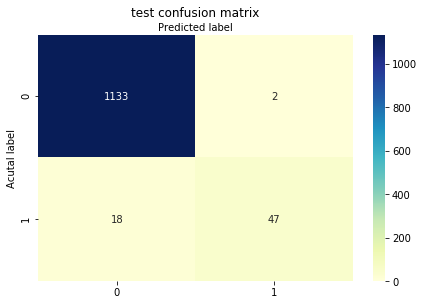

In [52]:
y_train_pred = (lg_sm_1.predict(sm.add_constant(X_train))>0.5).astype(int)

y_test_pred  = (lg_sm_1.predict(sm.add_constant(X_test))>0.5).astype(int)

#print(y_train)
#print(y_train_pred)

cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)

cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

# train
plot_confusion_matrix_1(cf_matrix_train, "train")
compute_performace(y_train, y_train_pred, title="train")

# test
plot_confusion_matrix_1(cf_matrix_test, "test")
compute_performace(y_test, y_test_pred, title="test")


# adding sample weights

In [55]:
w = [ratio/100, (100-ratio)/100]

lg_sm_2 = sm.Logit(y_train, sm.add_constant(X_train), sample_weight=w, family = "binomial").fit() 

lg_sm_2.summary()

Optimization terminated successfully.
         Current function value: 0.074366
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2797
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.6405
Time:                        23:09:04   Log-Likelihood:                -208.23
converged:                       True   LL-Null:                       -579.16
                                        LLR p-value:                8.026e-162
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8816      0.252     -3.494      0.000      -1.376      -0.387
x1             3.7343      0.241     15.501      0.000       3.262       4.206
x2             1.9179      0.317      6.047      0.000       1.296       2.540
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Accuracy Score: 0.9866666666666667
Area Under Curve: 0.9096560298383755
Recall score: 0.8245614035087719


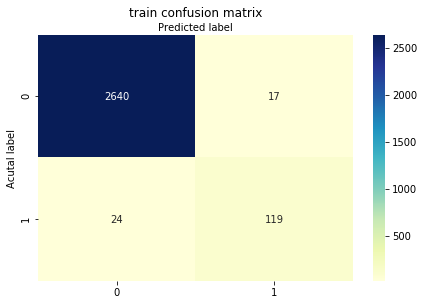

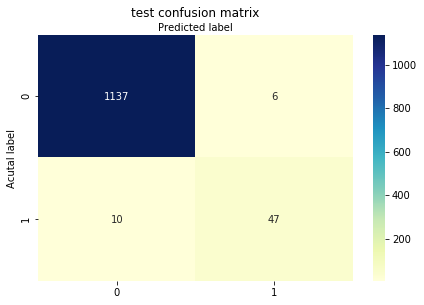

In [14]:
y_train_pred = (lg_sm_2.predict(sm.add_constant(X_train))>0.5).astype(int)

y_test_pred  = (lg_sm_2.predict(sm.add_constant(X_test))>0.5).astype(int)

#print(y_train)
#print(y_train_pred)

cf_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)

cf_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix_1(cf_matrix_train, title="train")
plot_confusion_matrix_1(cf_matrix_test, title="test")

print(f'Accuracy Score: {metrics.accuracy_score(y_test,y_test_pred)}')
print(f'Area Under Curve: {metrics.roc_auc_score(y_test, y_test_pred)}')
print(f'Recall score: {metrics.recall_score(y_test,y_test_pred)}')